In [1]:
import os

In [2]:
dataset_path = '/Users/krish_mamtora/Documents/codes/PythonMediapipe/ML_Project/Dataset'

In [3]:
print("Classes in the dataset:", os.listdir(dataset_path))


Classes in the dataset: ['1. Cover Drive', '.DS_Store', '2. Straight Drive', '5. Scoop Shot', '3. Pull Shot', '4. Leg Glance Shot', '0. Cut Shot']


In [4]:

classes = os.listdir(dataset_path)
print("Classes in the dataset:", classes)


Classes in the dataset: ['1. Cover Drive', '.DS_Store', '2. Straight Drive', '5. Scoop Shot', '3. Pull Shot', '4. Leg Glance Shot', '0. Cut Shot']


In [6]:
for class_name in classes:
    class_folder = os.path.join(dataset_path, class_name)
    
    if os.path.isdir(class_folder):
        image_count = len([f for f in os.listdir(class_folder) if os.path.isfile(os.path.join(class_folder, f))])
        print(f"Class '{class_name}' contains {image_count} images.")
    else:
        print(f"'{class_folder}' is not a valid directory.")

Class '1. Cover Drive' contains 600 images.
'/Users/krish_mamtora/Documents/codes/PythonMediapipe/ML_Project/Dataset/.DS_Store' is not a valid directory.
Class '2. Straight Drive' contains 600 images.
Class '5. Scoop Shot' contains 600 images.
Class '3. Pull Shot' contains 601 images.
Class '4. Leg Glance Shot' contains 600 images.
Class '0. Cut Shot' contains 600 images.


In [7]:
import cv2
import numpy as np
from tensorflow.keras.utils import to_categorical


/Users/krish_mamtora/Documents/codes/PythonMediapipe/myenv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [8]:
IMG_SIZE = 224  
classes = ['0. Cut Shot', '1. Cover Drive', '2. Straight Drive', '3. Pull Shot', '4. Leg Glance Shot', '5. Scoop Shot']
class_to_label = {name: idx for idx, name in enumerate(classes)}  # Map class names to numeric labels


In [9]:
data = []
labels = []


In [10]:
for class_name in classes:
    class_folder = os.path.join(dataset_path, class_name)
    label = class_to_label[class_name]  

    for file_name in os.listdir(class_folder):
        file_path = os.path.join(class_folder, file_name)

        img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)  
        if img is None:
            print(f"Failed to load {file_path}. Skipping...")
            continue

        img = cv2.bilateralFilter(img, 9, 75, 75)  

        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))

        img = img / 255.0  

        img = img.flatten()

        data.append(img)
        labels.append(label)


Failed to load /Users/krish_mamtora/Documents/codes/PythonMediapipe/ML_Project/Dataset/3. Pull Shot/.DS_Store. Skipping...


In [11]:
# Convert lists to NumPy arrays
data = np.array(data, dtype="float32")
labels = np.array(labels)

In [15]:
import cv2
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV  
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, accuracy_score
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt


In [16]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)


In [17]:

# Hyperparameter Tuning with GridSearchCV
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

In [18]:
# Train an SVM classifier
# svm_classifier = SVC(kernel='linear')  # You can try other kernels like 'rbf' or 'poly'
# svm_classifier.fit(X_train, y_train)
# GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(SVC(), param_grid, refit=True, verbose=3, cv=5)  # 5-fold cross-validation
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV 1/5] END .C=0.1, gamma=scale, kernel=linear;, score=0.677 total time= 2.2min
[CV 2/5] END .C=0.1, gamma=scale, kernel=linear;, score=0.684 total time= 2.3min
[CV 3/5] END .C=0.1, gamma=scale, kernel=linear;, score=0.661 total time= 2.0min
[CV 4/5] END .C=0.1, gamma=scale, kernel=linear;, score=0.691 total time= 1.9min
[CV 5/5] END .C=0.1, gamma=scale, kernel=linear;, score=0.694 total time= 2.2min
[CV 1/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.399 total time= 4.8min
[CV 2/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.380 total time= 4.4min
[CV 3/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.375 total time= 4.6min
[CV 4/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.405 total time= 5.0min
[CV 5/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.425 total time= 5.0min
[CV 1/5] END ...C=0.1, gamma=scale, kernel=poly;, score=0.608 total time= 2.8min
[CV 2/5] END ...C=0.1, gamma=scale, kernel=poly;

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']},
             verbose=3)

In [19]:
# Best hyperparameters from GridSearchCV
print("Best parameters found: ", grid_search.best_params_)

Best parameters found:  {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}


In [20]:
# Train the model with the best parameters found
svm_classifier = grid_search.best_estimator_

In [21]:
y_pred = svm_classifier.predict(X_test)


In [22]:
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=classes))
print("Accuracy Score:", accuracy_score(y_test, y_pred))


Classification Report:
                     precision    recall  f1-score   support

       0. Cut Shot       0.78      0.69      0.73       147
    1. Cover Drive       0.79      0.75      0.77       119
 2. Straight Drive       0.79      0.78      0.78       119
      3. Pull Shot       0.73      0.74      0.74       111
4. Leg Glance Shot       0.74      0.85      0.79       117
     5. Scoop Shot       0.80      0.85      0.82       107

          accuracy                           0.77       720
         macro avg       0.77      0.78      0.77       720
      weighted avg       0.77      0.77      0.77       720

Accuracy Score: 0.7722222222222223


In [ ]:
#output visualization

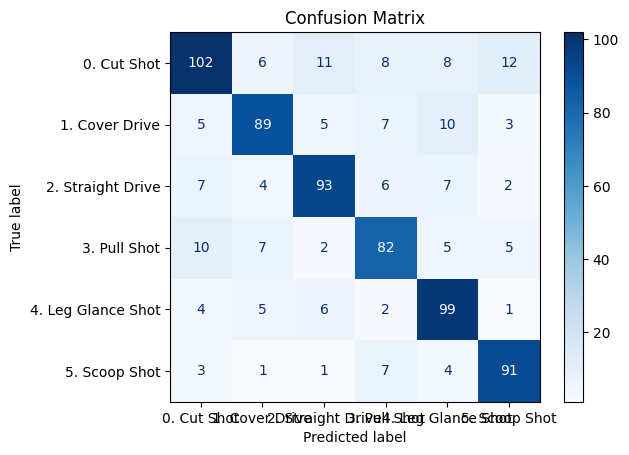

In [23]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()
